# Income Tax in the US

Income tax data is collected for different states in the US. It consists of several excel sheets: raw data of total income taxes collected, consumption rate per state, locations and tax codes.
The dataset is poorly structured and in need of tidying up to improve its quality. 

Initial dataset is saved here: https://docs.google.com/spreadsheets/d/1JEhog1MXnOWxJGjfDhJ0BcpvE4bxUxF0cik08UR4EqI/edit?usp=sharing 

**Questions to answer during the research:**

1. Determine state which has the highest amount of taxes per person.
2. Determine state with the third largest amount of collected taxes.
3. Name region with the smallest value of sum of "Individual Income Taxes" and "Income Taxes"
4. Calculate percent changes of personal consumption expenditures between 2018 and 2020 for each state and determine state and year with highest change (example: Florida 2018/2019)
5. Determine Region with the highest average Personal Consumption Expenditures per person in 2020
6. Prepare a dashboard(s) in one of data visualization to present:
1) Amount of taxes collected per person in each state.
2) Amount of taxes collected in each state.
3) Breakdown of collected taxes (tax types).
4) How value of personal consumption expenditures has changed in time.
5) Ranking of regions based on average value of personal consumption expenditures per person.

### **Research design:**
- Data reading, overview, data quality check.
- Cleaning the data, improving the data quality, creating a final dataset for further analysis.
- Data analysis, searching for insights in data, answering research questions.
- Making general conclusions and suggestions for further research.

## 1.	Data reading, merging & overview

### 1.1 Open the file, read all existing sheets with data and get a general infomation about the dataset.

- ___raw_data___

In [929]:
import pandas as pd

In [930]:
raw_data = pd.read_excel('/Users/yuliabezginova/PycharmProjects/income_tax/income_tax_US_082022.xlsx',sheet_name = 'raw_data')
raw_data

,State/Region,State Code,Tax Name,Tax Code,Taxes Collected,Population
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,United States,0.0,Total Taxes,T00,953954745,NaN
3,United States,0.0,Property Taxes,T01,19030677,NaN
4,United States,0.0,Sales and Gross Receipts Taxes,TA1,458555919,NaN
...,...,...,...,...,...,...
1730,Washington,48.0,Death and Gift Taxes,T50,167972,NaN
1731,Washington,48.0,Documentarty and Stock Transfer Taxes,T51,1072649,NaN
1732,Washington,48.0,Severance Taxes,T53,35055,NaN
1733,Washington,48.0,"Taxes, NEC",T99,0,NaN


In [931]:
raw_data = raw_data.iloc[3:,].reset_index()
raw_data

,index,State/Region,State Code,Tax Name,Tax Code,Taxes Collected,Population
0,3,United States,0.0,Property Taxes,T01,19030677,NaN
1,4,United States,0.0,Sales and Gross Receipts Taxes,TA1,458555919,NaN
2,5,United States,0.0,General Sales and Gross Receipts Taxes,T09,300992624,NaN
3,6,United States,0.0,Selective Sales and Gross Receipts Taxes,TA2,157563295,NaN
4,7,United States,0.0,Alcoholic Beverages Sales Tax,T10,6626413,NaN
...,...,...,...,...,...,...,...
1727,1730,Washington,48.0,Death and Gift Taxes,T50,167972,NaN
1728,1731,Washington,48.0,Documentarty and Stock Transfer Taxes,T51,1072649,NaN
1729,1732,Washington,48.0,Severance Taxes,T53,35055,NaN
1730,1733,Washington,48.0,"Taxes, NEC",T99,0,NaN


In [932]:
raw_data.columns = raw_data.columns.str.lower()
raw_data

,index,state/region,state code,tax name,tax code,taxes collected,population
0,3,United States,0.0,Property Taxes,T01,19030677,NaN
1,4,United States,0.0,Sales and Gross Receipts Taxes,TA1,458555919,NaN
2,5,United States,0.0,General Sales and Gross Receipts Taxes,T09,300992624,NaN
3,6,United States,0.0,Selective Sales and Gross Receipts Taxes,TA2,157563295,NaN
4,7,United States,0.0,Alcoholic Beverages Sales Tax,T10,6626413,NaN
...,...,...,...,...,...,...,...
1727,1730,Washington,48.0,Death and Gift Taxes,T50,167972,NaN
1728,1731,Washington,48.0,Documentarty and Stock Transfer Taxes,T51,1072649,NaN
1729,1732,Washington,48.0,Severance Taxes,T53,35055,NaN
1730,1733,Washington,48.0,"Taxes, NEC",T99,0,NaN


In [933]:
raw_data = raw_data.rename(columns={'state/region': 'state', 'state code': 'state_code', 'tax name': 'tax_name', 'tax code': 'tax_code', 'taxes collected': 'taxes_collected'})
raw_data

,index,state,state_code,tax_name,tax_code,taxes_collected,population
0,3,United States,0.0,Property Taxes,T01,19030677,NaN
1,4,United States,0.0,Sales and Gross Receipts Taxes,TA1,458555919,NaN
2,5,United States,0.0,General Sales and Gross Receipts Taxes,T09,300992624,NaN
3,6,United States,0.0,Selective Sales and Gross Receipts Taxes,TA2,157563295,NaN
4,7,United States,0.0,Alcoholic Beverages Sales Tax,T10,6626413,NaN
...,...,...,...,...,...,...,...
1727,1730,Washington,48.0,Death and Gift Taxes,T50,167972,NaN
1728,1731,Washington,48.0,Documentarty and Stock Transfer Taxes,T51,1072649,NaN
1729,1732,Washington,48.0,Severance Taxes,T53,35055,NaN
1730,1733,Washington,48.0,"Taxes, NEC",T99,0,NaN


In [934]:
raw_data = raw_data.iloc[:, 1:]
raw_data

,state,state_code,tax_name,tax_code,taxes_collected,population
0,United States,0.0,Property Taxes,T01,19030677,NaN
1,United States,0.0,Sales and Gross Receipts Taxes,TA1,458555919,NaN
2,United States,0.0,General Sales and Gross Receipts Taxes,T09,300992624,NaN
3,United States,0.0,Selective Sales and Gross Receipts Taxes,TA2,157563295,NaN
4,United States,0.0,Alcoholic Beverages Sales Tax,T10,6626413,NaN
...,...,...,...,...,...,...
1727,Washington,48.0,Death and Gift Taxes,T50,167972,NaN
1728,Washington,48.0,Documentarty and Stock Transfer Taxes,T51,1072649,NaN
1729,Washington,48.0,Severance Taxes,T53,35055,NaN
1730,Washington,48.0,"Taxes, NEC",T99,0,NaN


### 1.2 Searching for abnormal values

**Check the column _'tax_name'_ with categorical variable.**

In [938]:
raw_data['tax_name'].unique() # call for unique values

array(['Property Taxes', 'Sales and Gross Receipts Taxes',
       'General Sales and Gross Receipts Taxes',
       'Selective Sales   and Gross Receipts    Taxes',
       'Alcoholic Beverages Sales Tax', 'Amusements Sales Tax',
       'Insurance Premiums Sales Tax', 'Motor Fuels Sales Tax',
       'Pari-mutuels Sales Tax', 'Public   Utilities   Sales   Tax',
       'Tobacco   Products   Sales   Tax',
       'Other   Selective   Sales   and   Gross   Receipts   Taxes',
       'License   Taxes', 'Alcoholic   Beverages   License',
       'Amusements License', 'Corporations in General License',
       'Hunting and Fishing License', 'Motor Vehicle License',
       'Motor Vehicle Operators License', 'Public Utilities License',
       'Occupation and Business License, NEC', 'Other//License//Taxes',
       'Income//Taxes', 'Individual//Income//Taxes',
       'Corporations//Net//Income//Taxes', 'Other//Taxes',
       'Death//and//Gift//Taxes',
       'Documentarty//and//Stock//Transfer//Taxes',

From the output above we conclude that the column _'tax_name'_ should be cleaned up.

In [939]:
raw_data.dtypes

state               object
state_code         float64
tax_name            object
tax_code            object
taxes_collected     object
population          object
dtype: object

In [940]:
raw_data['tax_name'] = raw_data['tax_name'].astype(str)

In [941]:
import re # importing module regex (template language

compiler = re.compile(r'([A-Z]+[a-z]+)|([a-z]+)|(NEC)+')
# compile is a function
# r - a regulare expession 
# '([A-Z]+[a-z]+)|([a-z]+)|(NEC)+' - phrase for keeping words only

def tax_name(tax_name):
    norm = '' 
    # compiled data
    
    groups = compiler.findall(tax_name)
    for gr in groups:
        for s in gr:
             if s != '':
                norm+=s + ' '
    norm = norm.strip() # strip deletes spaces in the beginning and the end of the sentence
    return norm
#         print(gr)
raw_data['tax_name'] =  raw_data['tax_name'].apply(tax_name)

In [942]:
raw_data['tax_name'].unique()

array(['Property Taxes', 'Sales and Gross Receipts Taxes',
       'General Sales and Gross Receipts Taxes',
       'Selective Sales and Gross Receipts Taxes',
       'Alcoholic Beverages Sales Tax', 'Amusements Sales Tax',
       'Insurance Premiums Sales Tax', 'Motor Fuels Sales Tax',
       'Pari mutuels Sales Tax', 'Public Utilities Sales Tax',
       'Tobacco Products Sales Tax',
       'Other Selective Sales and Gross Receipts Taxes', 'License Taxes',
       'Alcoholic Beverages License', 'Amusements License',
       'Corporations in General License', 'Hunting and Fishing License',
       'Motor Vehicle License', 'Motor Vehicle Operators License',
       'Public Utilities License', 'Occupation and Business License NEC',
       'Other License Taxes', 'Income Taxes', 'Individual Income Taxes',
       'Corporations Net Income Taxes', 'Other Taxes',
       'Death and Gift Taxes', 'Documentarty and Stock Transfer Taxes',
       'Severance Taxes', 'Taxes NEC', 'nan', 'Total Taxes',
    

There are _'nan'_, let's check them.

In [943]:
print(raw_data.isna().sum())

state                60
state_code           69
tax_name              0
tax_code            121
taxes_collected     121
population         1680
dtype: int64


In [720]:
raw_data[raw_data['tax_name'] == 'nan']['tax_name'].count() / len(raw_data['tax_name']) * 100

6.986143187066975

We can see there are 6.9% of incorrect data which is less 10%, thus those lines should be excluded.

In [721]:
raw_data_final = raw_data[raw_data['tax_name'] != 'nan']
raw_data_final

,state,state_code,tax_name,tax_code,taxes_collected,population
0,United States,0.0,Property Taxes,T01,19030677,NaN
1,United States,0.0,Sales and Gross Receipts Taxes,TA1,458555919,NaN
2,United States,0.0,General Sales and Gross Receipts Taxes,T09,300992624,NaN
3,United States,0.0,Selective Sales and Gross Receipts Taxes,TA2,157563295,NaN
4,United States,0.0,Alcoholic Beverages Sales Tax,T10,6626413,NaN
...,...,...,...,...,...,...
1726,Washington,48.0,Other Taxes,TA5,1275676,NaN
1727,Washington,48.0,Death and Gift Taxes,T50,167972,NaN
1728,Washington,48.0,Documentarty and Stock Transfer Taxes,T51,1072649,NaN
1729,Washington,48.0,Severance Taxes,T53,35055,NaN


**Done!** The column _'tax_name'_ is now clean.

- ___consumption_data___

Read the sheet _'consumption_data'_ with a correct labeling:

In [722]:
consumption_data = pd.read_excel('/Users/yuliabezginova/PycharmProjects/income_tax/income_tax_US_082022.xlsx', sheet_name = 'consumption_data')
consumption_data

,Unnamed: 0,"Total Personal Consumption Expenditures, by State, 2018–2020",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Year/State,United States total,Connecticut,Maine,Massachusetts,New Hampshire,Rhode Island,Vermont,Delaware,...,Montana,Utah,Wyoming,Alaska,California,Hawaii,Nevada,Oregon,Washington,Net expenditures abroad by U.S. residents1
2,Millions of dollars,2018,13913531,181568,60086,364730,69527,45923,30020,44250,...,43990,113864,24352,36645,1835635,64439,120132,172989,347411,10461
3,NaN,2019,14428676,185316,62130,377584,72030,47198,30756,45865,...,45545,119970,24839,37780,1921463,66977,125927,180750,363100,11432
4,NaN,2020,14047565,179406,61124,358472,70719,45397,29545,44834,...,45719,121445,24467,35636,1835981,63427,123054,178375,354219,11110
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,1. Net expenditures abroad by U.S. residents c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,Note. Percent change from preceding period was...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,Source. U.S. Bureau of Economic Analysis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [723]:
consumption_data = consumption_data.iloc[2:5, 1:]
consumption_data

,"Total Personal Consumption Expenditures, by State, 2018–2020",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54
2,2018,13913531,181568,60086,364730,69527,45923,30020,44250,47631,...,43990,113864,24352,36645,1835635,64439,120132,172989,347411,10461
3,2019,14428676,185316,62130,377584,72030,47198,30756,45865,49318,...,45545,119970,24839,37780,1921463,66977,125927,180750,363100,11432
4,2020,14047565,179406,61124,358472,70719,45397,29545,44834,46454,...,45719,121445,24467,35636,1835981,63427,123054,178375,354219,11110


In [724]:
consumption_data.columns

Index(['Total Personal Consumption Expenditures, by State, 2018–2020',
       'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43',
       'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47',
       'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51',
       'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54'],
      dtype='object')

Rename the columns accordingly:

Year/State	
United States total	
Connecticut	
Maine	
Massachusetts	
New Hampshire	
Rhode Island	
Vermont	
Delaware	
District of Columbia	
Maryland	
New Jersey	
New York	
Pennsylvania	
Illinois	
Indiana	
Michigan	
Ohio	
Wisconsin	
Iowa	
Kansas	
Minnesota	
Missouri	
Nebraska	
North Dakota	
South Dakota	
Alabama	
Arkansas	
Florida	
Georgia	
Kentucky	
Louisiana	
Mississippi	
North Carolina	
South Carolina	
Tennessee	
Virginia	
West Virginia	
Arizona	
New Mexico	
Oklahoma	
Texas	
Colorado	
Idaho	
Montana	
Utah	
Wyoming	
Alaska	
California	
Hawaii	
Nevada	
Oregon	
Washington	
Net expenditures abroad by U.S. residenta1

In [725]:
consumption_data = consumption_data.rename(columns={
'Total Personal Consumption Expenditures, by State, 2018–2020': 'year',
       'Unnamed: 2' : 'United States total', 
    'Unnamed: 3': 'Connecticut', 
    'Unnamed: 4': 'Maine', 
    'Unnamed: 5': 'Massachusetts', 
    'Unnamed: 6': 'New Hampshire',
       'Unnamed: 7': 'Rhode Island', 
    'Unnamed: 8': 'Vermont', 
    'Unnamed: 9': 'Delaware', 
    'Unnamed: 10': 'District of Columbia', 
    'Unnamed: 11': 'Maryland',
       'Unnamed: 12': 'New Jersey', 
    'Unnamed: 13': 'New York', 
    'Unnamed: 14': 'Pennsylvania', 
    'Unnamed: 15': 'Illinois',
       'Unnamed: 16': 'Indiana', 
    'Unnamed: 17': 'Michigan', 
    'Unnamed: 18': 'Ohio', 
    'Unnamed: 19': 'Wisconsin',
       'Unnamed: 20': 'Iowa', 
    'Unnamed: 21': 'Kansas', 
    'Unnamed: 22': 'Minnesota', 
    'Unnamed: 23': 'Missouri',
       'Unnamed: 24': 'Nebraska', 
    'Unnamed: 25': 'North Dakota', 
    'Unnamed: 26': 'South Dakota', 
    'Unnamed: 27': 'Alabama',
       'Unnamed: 28': 'Arkansas', 
    'Unnamed: 29': 'Florida', 
    'Unnamed: 30': 'Georgia', 
    'Unnamed: 31': 'Kentucky',
       'Unnamed: 32': 'Louisiana', 
    'Unnamed: 33': 'Mississippi', 
    'Unnamed: 34': 'North Carolina', 
    'Unnamed: 35': 'South Carolina',
       'Unnamed: 36': 'Tennessee', 
    'Unnamed: 37': 'Virginia', 
    'Unnamed: 38': 'West Virginia', 
    'Unnamed: 39': 'Arizona',
       'Unnamed: 40': 'New Mexico', 
    'Unnamed: 41': 'Oklahoma', 
    'Unnamed: 42': 'Texas', 
    'Unnamed: 43': 'Colorado',
       'Unnamed: 44': 'Idaho', 
    'Unnamed: 45': 'Montana', 
    'Unnamed: 46': 'Utah', 
    'Unnamed: 47': 'Wyoming',
       'Unnamed: 48': 'Alaska', 
    'Unnamed: 49': 'California', 
    'Unnamed: 50': 'Hawaii', 
    'Unnamed: 51': 'Nevada',
       'Unnamed: 52': 'Oregon', 
    'Unnamed: 53': 'Washington', 
    'Unnamed: 54' : 'Net expenditures abroad by U.S. residenta1',
})
consumption_data

,year,United States total,Connecticut,Maine,Massachusetts,New Hampshire,Rhode Island,Vermont,Delaware,District of Columbia,...,Montana,Utah,Wyoming,Alaska,California,Hawaii,Nevada,Oregon,Washington,Net expenditures abroad by U.S. residenta1
2,2018,13913531,181568,60086,364730,69527,45923,30020,44250,47631,...,43990,113864,24352,36645,1835635,64439,120132,172989,347411,10461
3,2019,14428676,185316,62130,377584,72030,47198,30756,45865,49318,...,45545,119970,24839,37780,1921463,66977,125927,180750,363100,11432
4,2020,14047565,179406,61124,358472,70719,45397,29545,44834,46454,...,45719,121445,24467,35636,1835981,63427,123054,178375,354219,11110


Let's create a panel data out of _'consumption_data'_.

In [726]:
consumption_data = pd.melt(consumption_data, id_vars="year") # creating a panel data
consumption_data

,year,variable,value
0,2018,United States total,13913531
1,2019,United States total,14428676
2,2020,United States total,14047565
3,2018,Connecticut,181568
4,2019,Connecticut,185316
...,...,...,...
154,2019,Washington,363100
155,2020,Washington,354219
156,2018,Net expenditures abroad by U.S. residenta1,10461
157,2019,Net expenditures abroad by U.S. residenta1,11432


Rename and sort values in the _'consumption_data'_ dataset.

In [727]:
consumption_data = consumption_data.rename(columns={'variable': 'state', 'value': 'consumption'})
consumption_data.sort_values(by='consumption', ascending=False)

,year,state,consumption
1,2019,United States total,14428676
2,2020,United States total,14047565
0,2018,United States total,13913531
142,2019,California,1921463
143,2020,California,1835981
...,...,...,...
137,2020,Wyoming,24467
135,2018,Wyoming,24352
157,2019,Net expenditures abroad by U.S. residenta1,11432
158,2020,Net expenditures abroad by U.S. residenta1,11110


In [728]:
locations_data = pd.read_excel('/Users/yuliabezginova/PycharmProjects/income_tax/income_tax_US_082022.xlsx', sheet_name = 'locations')
locations_data

,Location Code,Latitude,Longitude
0,0,37.090240,-95.712891
1,1,32.318230,-86.902298
2,2,66.160507,-153.369141
3,3,34.048927,-111.093735
4,4,34.799999,-92.199997
5,5,36.778259,-119.417931
6,6,39.113014,-105.358887
7,7,41.599998,-72.699997
8,8,39.000000,-75.500000
9,10,27.994402,-81.760254


In [729]:
tax_selector_data = pd.read_excel('/Users/yuliabezginova/PycharmProjects/income_tax/income_tax_US_082022.xlsx', sheet_name = 'tax_selector')
tax_selector_data

,Tax Code,Include?
0,T00,yes
1,T01,yes
2,TA1,no
3,T09,no
4,TA2,no
5,T10,no
6,T11,no
7,T12,no
8,T13,no
9,T14,no


In [730]:
tax_selector_data = tax_selector_data.rename(columns={'Tax Code': 'tax_code'})
tax_selector_data

,tax_code,Include?
0,T00,yes
1,T01,yes
2,TA1,no
3,T09,no
4,TA2,no
5,T10,no
6,T11,no
7,T12,no
8,T13,no
9,T14,no


### 1.3 Merging datasets _'raw_data_final', 'consumption_data', 'tax_selector_data'_

Before merging, we have to extract three datasets out of _'raw_data_final', 'consumption_data', 'tax_selector_data'_ per each year - 2018, 2019, 2020.

- _raw_data_final_

In [731]:
raw_data_final

,state,state_code,tax_name,tax_code,taxes_collected,population
0,United States,0.0,Property Taxes,T01,19030677,NaN
1,United States,0.0,Sales and Gross Receipts Taxes,TA1,458555919,NaN
2,United States,0.0,General Sales and Gross Receipts Taxes,T09,300992624,NaN
3,United States,0.0,Selective Sales and Gross Receipts Taxes,TA2,157563295,NaN
4,United States,0.0,Alcoholic Beverages Sales Tax,T10,6626413,NaN
...,...,...,...,...,...,...
1726,Washington,48.0,Other Taxes,TA5,1275676,NaN
1727,Washington,48.0,Death and Gift Taxes,T50,167972,NaN
1728,Washington,48.0,Documentarty and Stock Transfer Taxes,T51,1072649,NaN
1729,Washington,48.0,Severance Taxes,T53,35055,NaN


- _consumption_data_

In [732]:
consumption_data

,year,state,consumption
0,2018,United States total,13913531
1,2019,United States total,14428676
2,2020,United States total,14047565
3,2018,Connecticut,181568
4,2019,Connecticut,185316
...,...,...,...
154,2019,Washington,363100
155,2020,Washington,354219
156,2018,Net expenditures abroad by U.S. residenta1,10461
157,2019,Net expenditures abroad by U.S. residenta1,11432


- _tax_selector_data_

In [733]:
data = consumption_data.merge(raw_data_final, on='state', how='outer')
data

,year,state,consumption,state_code,tax_name,tax_code,taxes_collected,population
0,2018,United States total,13913531,NaN,NaN,NaN,NaN,NaN
1,2019,United States total,14428676,NaN,NaN,NaN,NaN,NaN
2,2020,United States total,14047565,NaN,NaN,NaN,NaN,NaN
3,2018,Connecticut,181568,7.0,Total Taxes,T00,16686549,NaN
4,2018,Connecticut,181568,7.0,Property Taxes,T01,X,NaN
...,...,...,...,...,...,...,...,...
4715,NaN,DC,NaN,9.0,Other Taxes,TA5,557564,NaN
4716,NaN,DC,NaN,9.0,Death and Gift Taxes,T50,41215,NaN
4717,NaN,DC,NaN,9.0,Documentarty and Stock Transfer Taxes,T51,460901,NaN
4718,NaN,DC,NaN,9.0,Severance Taxes,T53,X,NaN


In [734]:
data = data.merge(tax_selector_data, on='tax_code', how='outer')
data.head(10)

,year,state,consumption,state_code,tax_name,tax_code,taxes_collected,population,Include?
0,2018,United States total,13913531,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,United States total,14428676,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,United States total,14047565,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,District of Columbia,47631,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,District of Columbia,49318,NaN,NaN,NaN,NaN,NaN,NaN
5,2020,District of Columbia,46454,NaN,NaN,NaN,NaN,NaN,NaN
6,2018,Net expenditures abroad by U.S. residenta1,10461,NaN,NaN,NaN,NaN,NaN,NaN
7,2019,Net expenditures abroad by U.S. residenta1,11432,NaN,NaN,NaN,NaN,NaN,NaN
8,2020,Net expenditures abroad by U.S. residenta1,11110,NaN,NaN,NaN,NaN,NaN,NaN
9,2018,Connecticut,181568,7.0,Total Taxes,T00,16686549,NaN,yes


**A dataset _'data'_ is a final dataset for further manipulation and analysis.**

In [735]:
data.columns # getting columns names

Index(['year', 'state', 'consumption', 'state_code', 'tax_name', 'tax_code',
       'taxes_collected', 'population', 'Include?'],
      dtype='object')

In [736]:
# rename columns in the final dataset
data = data.rename(columns={
                            'Include?': 'include?'
                           })
data.head(10)

,year,state,consumption,state_code,tax_name,tax_code,taxes_collected,population,include?
0,2018,United States total,13913531,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,United States total,14428676,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,United States total,14047565,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,District of Columbia,47631,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,District of Columbia,49318,NaN,NaN,NaN,NaN,NaN,NaN
5,2020,District of Columbia,46454,NaN,NaN,NaN,NaN,NaN,NaN
6,2018,Net expenditures abroad by U.S. residenta1,10461,NaN,NaN,NaN,NaN,NaN,NaN
7,2019,Net expenditures abroad by U.S. residenta1,11432,NaN,NaN,NaN,NaN,NaN,NaN
8,2020,Net expenditures abroad by U.S. residenta1,11110,NaN,NaN,NaN,NaN,NaN,NaN
9,2018,Connecticut,181568,7.0,Total Taxes,T00,16686549,NaN,yes


## 2.	Data pre-processing

### 2.1 Work with missings

**Let's check the share of missings in the data in each column.**

In [737]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
year,1.000000
state,0.000000
consumption,1.000000
state_code,0.000000
tax_name,0.000000
tax_code,0.000000
taxes_collected,0.000000
population,100.000000
include?,0.000000


**From the output above we can conclude that there are 97% of missings in _'population'_ column. We have to process this later.**

**All the other columns contain < 10% of missings, which can be either dropped or filled in with median values.**

In [738]:
data.count()

year               4659
state              4720
consumption        4659
state_code         4711
tax_name           4711
tax_code           4711
taxes_collected    4711
population            0
include?           4711
dtype: int64

Fill in the missings in _'consumption'_ with median values.

In [739]:
import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)

pd.options.mode.chained_assignment = None 

In [740]:
data['consumption'] = data['consumption'].fillna(data.groupby('state')['consumption'].transform('median'))
data['consumption'].isna().sum() / len(data)

0.012923728813559321

**From the above output, we can see that the column _'consumption'_ contains 2.6% of missings, which can be safely dropped.**


**Also we can drop missings in the other columns if the share of missing values is less than 10%. Let's check this, and if so, drop.**

In [741]:
data['state_code'].isna().sum() / len(data)

0.0019067796610169492

In [742]:
data['tax_name'].isna().sum() / len(data)

0.0019067796610169492

In [743]:
data['tax_code'].isna().sum() / len(data)

0.0019067796610169492

In [744]:
data['taxes_collected'].isna().sum() / len(data)

0.0019067796610169492

In [745]:
data['year'].isna().sum() / len(data)

0.012923728813559321

In [746]:
data['consumption'].isna().sum() / len(data)

0.012923728813559321

In [747]:
data['include?'].isna().sum() / len(data)

0.0019067796610169492

In [748]:
data = data.dropna(subset=['state_code', 'tax_name', 'tax_code', 'taxes_collected', 'year', 'consumption', 'include?'])
print(data['state_code'].isna().sum())
print(data['tax_name'].isna().sum())
print(data['tax_code'].isna().sum())
print(data['taxes_collected'].isna().sum())
print(data['year'].isna().sum())
print(data['consumption'].isna().sum())
print(data['include?'].isna().sum())

0
0
0
0
0
0
0


In [749]:
print(data['taxes_collected'].unique)

<bound method Series.unique of 9       16686549
10      16686549
11      16686549
12       4232556
13       4232556
          ...   
4713           0
4714           0
4715           0
4716           0
4717           0
Name: taxes_collected, Length: 4650, dtype: object>


In the column _'taxes_collected'_ there are abnormal values "X". Let's work with this.

In [750]:
print(data[data['taxes_collected'] == 'X']['taxes_collected'].count() / len(data)*100)

9.096774193548388


From the output above we can conclude that the share of 'tax_collected' == 'X' values is less than 10% in the dataset, meaning these values can be safely dropped.

In [751]:
data = data.drop(data[data['taxes_collected'] == 'X'].index)

In [752]:
data

,year,state,consumption,state_code,tax_name,tax_code,taxes_collected,population,include?
9,2018,Connecticut,181568.0,7.0,Total Taxes,T00,16686549,NaN,yes
10,2019,Connecticut,185316.0,7.0,Total Taxes,T00,16686549,NaN,yes
11,2020,Connecticut,179406.0,7.0,Total Taxes,T00,16686549,NaN,yes
12,2018,Maine,60086.0,20.0,Total Taxes,T00,4232556,NaN,yes
13,2019,Maine,62130.0,20.0,Total Taxes,T00,4232556,NaN,yes
...,...,...,...,...,...,...,...,...,...
4713,2019,Oregon,180750.0,38.0,Taxes NEC,T99,0,NaN,no
4714,2020,Oregon,178375.0,38.0,Taxes NEC,T99,0,NaN,no
4715,2018,Washington,347411.0,48.0,Taxes NEC,T99,0,NaN,no
4716,2019,Washington,363100.0,48.0,Taxes NEC,T99,0,NaN,no


### 2.2 Work with duplicates

In [753]:
data.duplicated().sum() # check whether there are duplicates

0

In [754]:
data.columns # displaying what columns the dataset

Index(['year', 'state', 'consumption', 'state_code', 'tax_name', 'tax_code',
       'taxes_collected', 'population', 'include?'],
      dtype='object')

In [755]:
print(data['state'].unique())

['Connecticut' 'Maine' 'Massachusetts' 'New Hampshire' 'Rhode Island'
 'Vermont' 'Delaware' 'Maryland' 'New Jersey' 'New York' 'Pennsylvania'
 'Illinois' 'Indiana' 'Michigan' 'Ohio' 'Wisconsin' 'Iowa' 'Kansas'
 'Minnesota' 'Missouri' 'Nebraska' 'North Dakota' 'South Dakota' 'Alabama'
 'Arkansas' 'Florida' 'Georgia' 'Kentucky' 'Louisiana' 'Mississippi'
 'North Carolina' 'South Carolina' 'Tennessee' 'Virginia' 'West Virginia'
 'Arizona' 'New Mexico' 'Oklahoma' 'Texas' 'Colorado' 'Idaho' 'Montana'
 'Utah' 'Wyoming' 'Alaska' 'California' 'Hawaii' 'Nevada' 'Oregon'
 'Washington']


**There are no either explicit or implicit duplicates in the dataset. We save this dataset as a final for further analysis.**

### 2.3 Changing data types

Check the type of each variable in the final dataset.

In [756]:
data.dtypes

year                object
state               object
consumption        float64
state_code         float64
tax_name            object
tax_code            object
taxes_collected     object
population          object
include?            object
dtype: object

We can see that some variables' types should be changed from _object_ to _int_ or _str_.

In [757]:
data['state'] = data['state'].astype(str)
data['state_code'] = data['state_code'].astype(str)
data['tax_collected'] = data['taxes_collected'].astype(int) # changinh the type to integer
data['year'] = data['year'].astype(int)
data['consumption'] = data['consumption'].astype(int)

Let's check the variables' types now.

In [758]:
data.dtypes

year                int64
state              object
consumption         int64
state_code         object
tax_name           object
tax_code           object
taxes_collected    object
population         object
include?           object
tax_collected       int64
dtype: object

**Done!**

### 2.4 Processing _'population'_ column

Remove the column _'population'_ from the dataset and add it in more readable format.

In [759]:
data = data.drop(labels=['population'], axis=1)
data

,year,state,consumption,state_code,tax_name,tax_code,taxes_collected,include?,tax_collected
9,2018,Connecticut,181568,7.0,Total Taxes,T00,16686549,yes,16686549
10,2019,Connecticut,185316,7.0,Total Taxes,T00,16686549,yes,16686549
11,2020,Connecticut,179406,7.0,Total Taxes,T00,16686549,yes,16686549
12,2018,Maine,60086,20.0,Total Taxes,T00,4232556,yes,4232556
13,2019,Maine,62130,20.0,Total Taxes,T00,4232556,yes,4232556
...,...,...,...,...,...,...,...,...,...
4713,2019,Oregon,180750,38.0,Taxes NEC,T99,0,no,0
4714,2020,Oregon,178375,38.0,Taxes NEC,T99,0,no,0
4715,2018,Washington,347411,48.0,Taxes NEC,T99,0,no,0
4716,2019,Washington,363100,48.0,Taxes NEC,T99,0,no,0


Adding _'population'_ columns in a readable format to the processed dataset. First, we create a function which split and distribute the values from _'raw_data'_ dataset.

In [760]:
population_by_state = raw_data[raw_data['population'].notna()][['state', 'population']]

def split_population(population:str):
    separated = population.strip().split(' ')
    return separated[1]

population_by_state['population'] = population_by_state['population'].apply(split_population)

In [761]:
population_by_state

,state,population
30,United States,325147121
65,Connecticut,3573880
98,Maine,1335063
131,Massachusetts,6863246
164,New Hampshire,1349767
197,Rhode Island,1056486
230,Vermont,624525
265,New Jersey,8888543
298,New York,19590719
331,Pennsylvania,12790447


Second, merge the newly created table _'population_by_state'_ with the processed dataset.

In [762]:
data = data.merge(population_by_state, on='state', how='left')
data

,year,state,consumption,state_code,tax_name,tax_code,taxes_collected,include?,tax_collected,population
0,2018,Connecticut,181568,7.0,Total Taxes,T00,16686549,yes,16686549,3573880
1,2019,Connecticut,185316,7.0,Total Taxes,T00,16686549,yes,16686549,3573880
2,2020,Connecticut,179406,7.0,Total Taxes,T00,16686549,yes,16686549,3573880
3,2018,Maine,60086,20.0,Total Taxes,T00,4232556,yes,4232556,1335063
4,2019,Maine,62130,20.0,Total Taxes,T00,4232556,yes,4232556,1335063
...,...,...,...,...,...,...,...,...,...,...
4222,2019,Oregon,180750,38.0,Taxes NEC,T99,0,no,0,4146592
4223,2020,Oregon,178375,38.0,Taxes NEC,T99,0,no,0,4146592
4224,2018,Washington,347411,48.0,Taxes NEC,T99,0,no,0,7425432
4225,2019,Washington,363100,48.0,Taxes NEC,T99,0,no,0,7425432


In [763]:
data = data.drop(labels=['tax_collected'], axis=1)
data

,year,state,consumption,state_code,tax_name,tax_code,taxes_collected,include?,population
0,2018,Connecticut,181568,7.0,Total Taxes,T00,16686549,yes,3573880
1,2019,Connecticut,185316,7.0,Total Taxes,T00,16686549,yes,3573880
2,2020,Connecticut,179406,7.0,Total Taxes,T00,16686549,yes,3573880
3,2018,Maine,60086,20.0,Total Taxes,T00,4232556,yes,1335063
4,2019,Maine,62130,20.0,Total Taxes,T00,4232556,yes,1335063
...,...,...,...,...,...,...,...,...,...
4222,2019,Oregon,180750,38.0,Taxes NEC,T99,0,no,4146592
4223,2020,Oregon,178375,38.0,Taxes NEC,T99,0,no,4146592
4224,2018,Washington,347411,48.0,Taxes NEC,T99,0,no,7425432
4225,2019,Washington,363100,48.0,Taxes NEC,T99,0,no,7425432


Checking for missing values in the merged dataset.

In [764]:
data = data.dropna(subset=['state_code', 'tax_name', 'tax_code', 'taxes_collected', 'year', 'consumption', 'include?'])
print(data['state_code'].isna().sum())
print(data['tax_name'].isna().sum())
print(data['tax_code'].isna().sum())
print(data['taxes_collected'].isna().sum())
print(data['year'].isna().sum())
print(data['consumption'].isna().sum())
print(data['include?'].isna().sum())

0
0
0
0
0
0
0


Check the variables' types.

In [765]:
data.dtypes

year                int64
state              object
consumption         int64
state_code         object
tax_name           object
tax_code           object
taxes_collected    object
include?           object
population         object
dtype: object

In [766]:
data['taxes_collected'] = data['taxes_collected'].astype(int)
data['consumption'] = data['consumption'].astype(int)
data['population'] = data['population'].astype(int)

In [767]:
data.dtypes

year                int64
state              object
consumption         int64
state_code         object
tax_name           object
tax_code           object
taxes_collected     int64
include?           object
population          int64
dtype: object

**Done!**

### 2.5 Keep only 'included?' as no.

As a final step of the analysis, we should keep for further analysis only if taxes **not included**, meaning to filter the dataset in the column 'include?' by _'no'_.

In [768]:
data_clean = data[data['include?'] == 'no']

In [769]:
# writing to csv
clean_income_tax_data = data_clean.to_csv('/Users/yuliabezginova/PycharmProjects/income_tax/clean_income_tax_data.csv')

In [770]:
# writing to xlsx
clean_income_tax_data = data_clean.to_excel('/Users/yuliabezginova/PycharmProjects/income_tax/clean_income_tax_data.xlsx')

Proceed with data analysis using the preprocessed dataset.

## 3.	Data Analysis & Research Questions

Reading the cleaned data.

In [771]:
data_clean = pd.read_csv('/Users/yuliabezginova/PycharmProjects/income_tax/clean_income_tax_data.csv')
data_clean = data_clean.drop(labels=['Unnamed: 0'], axis=1)
data_clean

,year,state,consumption,state_code,tax_name,tax_code,taxes_collected,include?,population
0,2018,Connecticut,181568,7.0,Sales and Gross Receipts Taxes,TA1,6991470,no,3573880
1,2019,Connecticut,185316,7.0,Sales and Gross Receipts Taxes,TA1,6991470,no,3573880
2,2020,Connecticut,179406,7.0,Sales and Gross Receipts Taxes,TA1,6991470,no,3573880
3,2018,Maine,60086,20.0,Sales and Gross Receipts Taxes,TA1,2165142,no,1335063
4,2019,Maine,62130,20.0,Sales and Gross Receipts Taxes,TA1,2165142,no,1335063
...,...,...,...,...,...,...,...,...,...
3415,2019,Oregon,180750,38.0,Taxes NEC,T99,0,no,4146592
3416,2020,Oregon,178375,38.0,Taxes NEC,T99,0,no,4146592
3417,2018,Washington,347411,48.0,Taxes NEC,T99,0,no,7425432
3418,2019,Washington,363100,48.0,Taxes NEC,T99,0,no,7425432


Rename the column _'state'_ to _'region'_ as required in the task.

In [772]:
data_clean = data_clean.rename(columns={'state': 'region'})
data_clean

,year,region,consumption,state_code,tax_name,tax_code,taxes_collected,include?,population
0,2018,Connecticut,181568,7.0,Sales and Gross Receipts Taxes,TA1,6991470,no,3573880
1,2019,Connecticut,185316,7.0,Sales and Gross Receipts Taxes,TA1,6991470,no,3573880
2,2020,Connecticut,179406,7.0,Sales and Gross Receipts Taxes,TA1,6991470,no,3573880
3,2018,Maine,60086,20.0,Sales and Gross Receipts Taxes,TA1,2165142,no,1335063
4,2019,Maine,62130,20.0,Sales and Gross Receipts Taxes,TA1,2165142,no,1335063
...,...,...,...,...,...,...,...,...,...
3415,2019,Oregon,180750,38.0,Taxes NEC,T99,0,no,4146592
3416,2020,Oregon,178375,38.0,Taxes NEC,T99,0,no,4146592
3417,2018,Washington,347411,48.0,Taxes NEC,T99,0,no,7425432
3418,2019,Washington,363100,48.0,Taxes NEC,T99,0,no,7425432


**Let's observe the numerial variables via histograms and check if there are any outstanding values.**

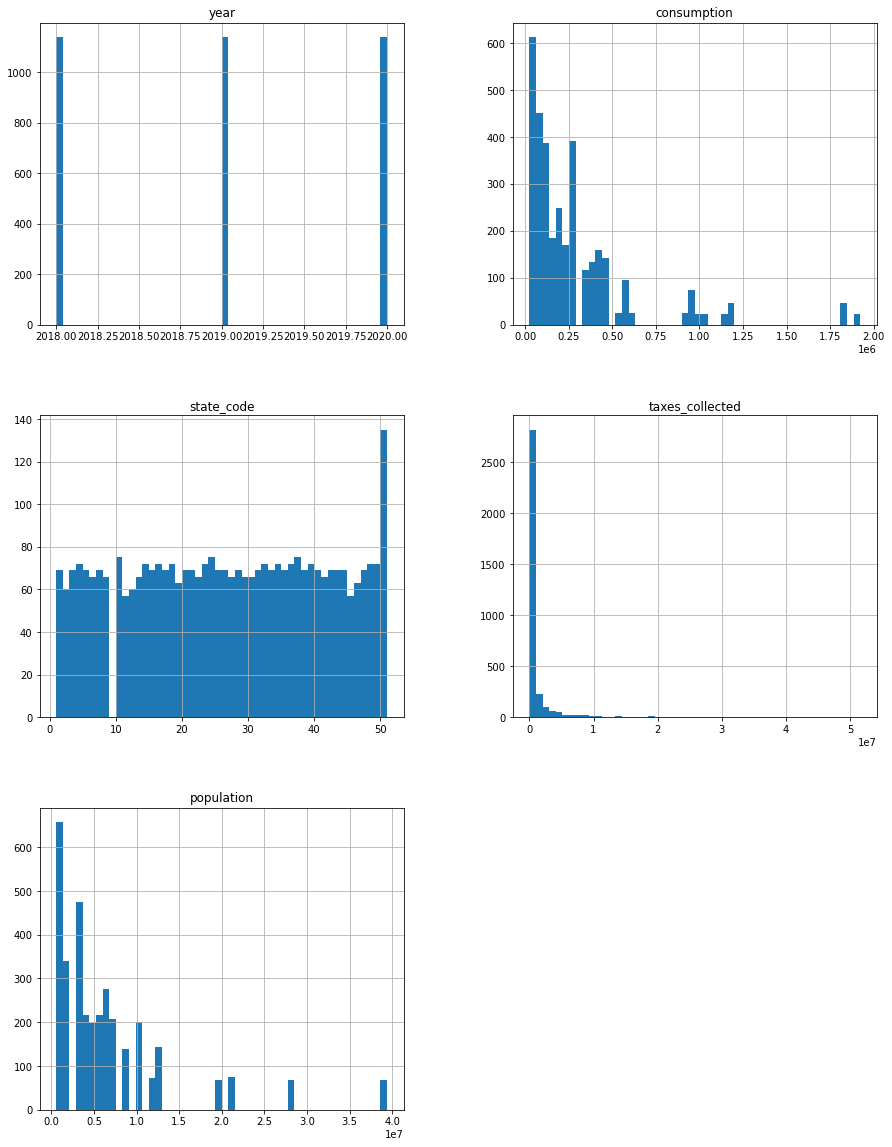

In [773]:
data_clean.hist(bins=50, figsize=(15, 20));
None

### _Descriptive Statistics_

**Let's check descriptive statistics for each numerical variable.**

In [774]:
data_clean.columns

Index(['year', 'region', 'consumption', 'state_code', 'tax_name', 'tax_code',
       'taxes_collected', 'include?', 'population'],
      dtype='object')

- **_taxes_collected_**

count    4.227000e+03
mean     2.112125e+06
std      7.670679e+06
min      0.000000e+00
25%      1.879600e+04
50%      1.462270e+05
75%      9.968480e+05
max      1.556919e+08
Name: taxes_collected, dtype: float64


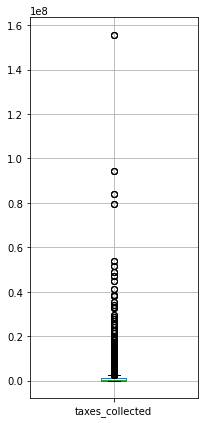

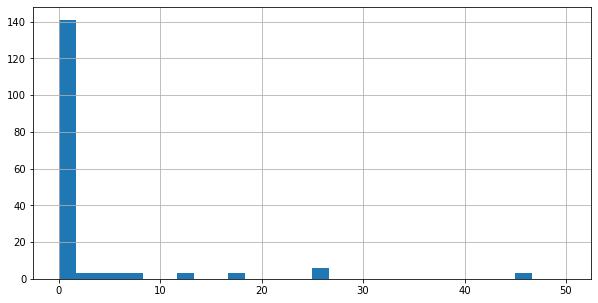

In [775]:
data_clean['taxes_collected'].describe()

import matplotlib.pyplot as plt

# descriptive statistics
print(data['taxes_collected'].describe())
data.boxplot(column='taxes_collected', figsize=(3,7));
plt.show()
data['taxes_collected'].hist(bins=30, range=(0, 50), figsize=(10, 5));

### Conclusion

- mean differs from median (50%), meaning there are some anomalies or outliers in the dataset;
- standard deviation is 4 times bigger than the mean, meaning the range is too large and the data is left-handed (positively) scattered.

- **_consumption_**

count    3.420000e+03
mean     2.860001e+05
std      3.355340e+05
min      2.435200e+04
25%      7.371450e+04
50%      1.783750e+05
75%      3.667520e+05
max      1.921463e+06
Name: consumption, dtype: float64


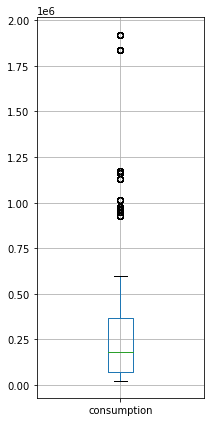

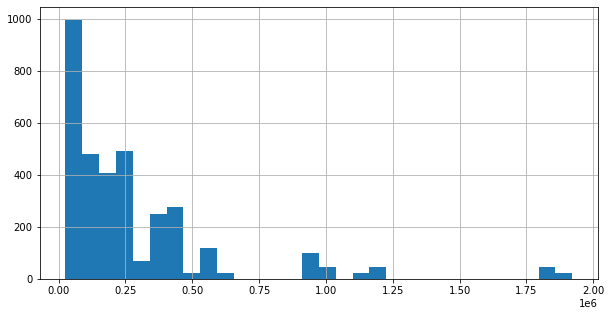

In [776]:
data_clean['consumption'].describe()

import matplotlib.pyplot as plt

# descriptive statistics
print(data_clean['consumption'].describe())
data_clean.boxplot(column='consumption', figsize=(3,7));
plt.show()
data_clean['consumption'].hist(bins=30, figsize=(10, 5));

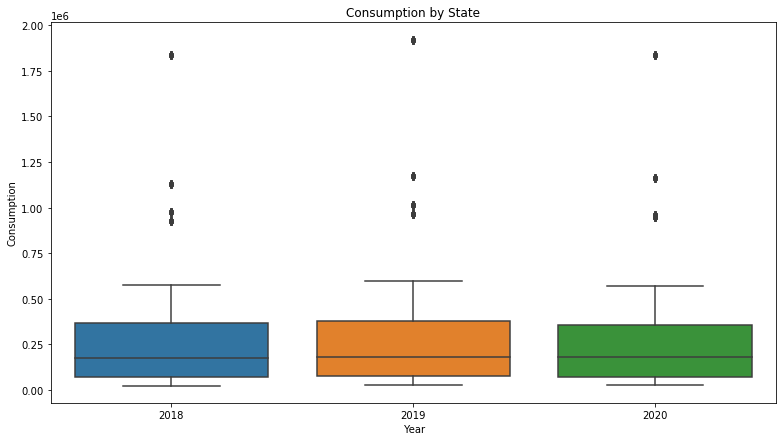

In [777]:
import seaborn as sns

plt.figure(figsize=(13, 7))
(sns.boxplot(data = data_clean, y = 'consumption', x='year')
    .set(title = 'Consumption by State', xlabel = ' Year', ylabel = 'Consumption'))
plt.show()

### Conclusion:
- mean is quite close to median (50%), meaning there are no so many outliers in the dataset.

''

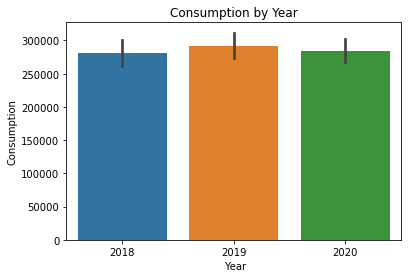

In [778]:
sns.barplot(x=data_clean['year'], y=data_clean['consumption']).\
set(title = 'Consumption by Year', xlabel = ' Year', ylabel = 'Consumption')
;


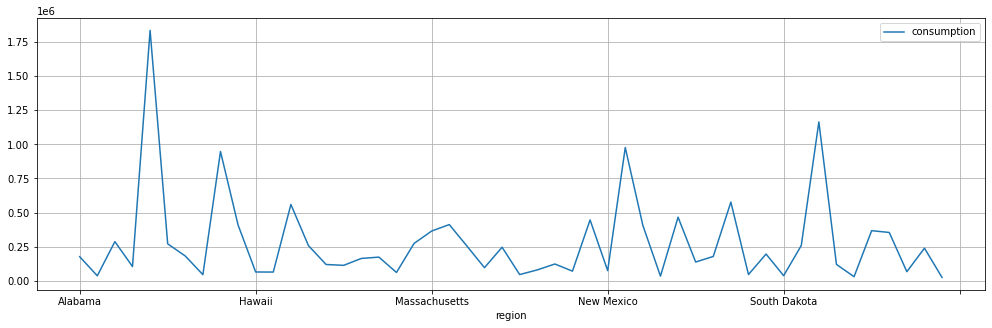

In [780]:
(
    data_clean
    .pivot_table(index=['region'], values='consumption', aggfunc='median')
    .plot(grid=True, figsize=(17, 5))
);

### 3.1 Determine state which has the highest amount of taxes per person.

Calculate in a separate column with tax per persone values in each state.

In [897]:
data_clean['tax_per_person'] = data_clean['taxes_collected'] / data_clean['population']
data_clean

,year,region,consumption,state_code,tax_name,tax_code,taxes_collected,include?,population,tax_per_person,cons_per_person,cons_change
0,2018,Connecticut,181568,7.0,Sales and Gross Receipts Taxes,TA1,6991470,no,3573880,1.956269,0.050804,NaN
1,2019,Connecticut,185316,7.0,Sales and Gross Receipts Taxes,TA1,6991470,no,3573880,1.956269,0.051853,0.020642
2,2020,Connecticut,179406,7.0,Sales and Gross Receipts Taxes,TA1,6991470,no,3573880,1.956269,0.050199,-0.031891
3,2018,Maine,60086,20.0,Sales and Gross Receipts Taxes,TA1,2165142,no,1335063,1.621753,0.045006,-0.103450
4,2019,Maine,62130,20.0,Sales and Gross Receipts Taxes,TA1,2165142,no,1335063,1.621753,0.046537,0.034018
...,...,...,...,...,...,...,...,...,...,...,...,...
3415,2019,Oregon,180750,38.0,Taxes NEC,T99,0,no,4146592,0.000000,0.043590,0.044864
3416,2020,Oregon,178375,38.0,Taxes NEC,T99,0,no,4146592,0.000000,0.043017,-0.013140
3417,2018,Washington,347411,48.0,Taxes NEC,T99,0,no,7425432,0.000000,0.046787,0.087625
3418,2019,Washington,363100,48.0,Taxes NEC,T99,0,no,7425432,0.000000,0.048900,0.045160


Group the data based on 'region' and mean value of the calculated tax per person amount.

In [907]:
tax_per_person_grouped = data_clean.groupby('region')[['taxes_collected', 'consumption', 'tax_per_person']].agg('mean').sort_values(by='tax_per_person', ascending=False)
# tax_per_person_grouped = data_clean_grouped.dropna()
tax_per_person_grouped

,taxes_collected,consumption,tax_per_person
region,,,
North Dakota,2.886237e+05,3.419033e+04,0.382194
Hawaii,5.281039e+05,6.494767e+04,0.370807
Nevada,8.517362e+05,1.230377e+05,0.286548
Washington,2.013389e+06,3.549100e+05,0.271148
Wyoming,1.455431e+05,2.455267e+04,0.251399
Vermont,1.509777e+05,3.010700e+04,0.241748
Connecticut,7.993339e+05,1.820967e+05,0.223660
Minnesota,1.188119e+06,2.562673e+05,0.213378
South Dakota,1.757757e+05,3.705200e+04,0.201281


In [909]:
print(tax_per_person_grouped[tax_per_person_grouped['tax_per_person'] == tax_per_person_grouped['tax_per_person'].max()])

              taxes_collected   consumption  tax_per_person
region                                                     
North Dakota     288623.73913  34190.333333        0.382194


In [784]:
data_clean_grouped = data_clean.groupby('region')[['taxes_collected', 'consumption', 'tax_per_person']].agg('median').sort_values(by='consumption', ascending=False)
data_clean_grouped = data_clean_grouped.dropna()
display(data_clean_grouped)

,taxes_collected,consumption,tax_per_person
region,,,
California,728045.0,1835981.0,0.018479
Texas,1228641.0,1164466.0,0.043380
New York,1265699.0,976857.0,0.064607
Florida,323393.0,947906.0,0.015417
Pennsylvania,930210.0,577036.0,0.072727
Illinois,388038.5,559565.0,0.030348
Ohio,134505.0,466160.0,0.011532
New Jersey,565736.0,446078.0,0.063648
Michigan,198226.5,411916.0,0.019869


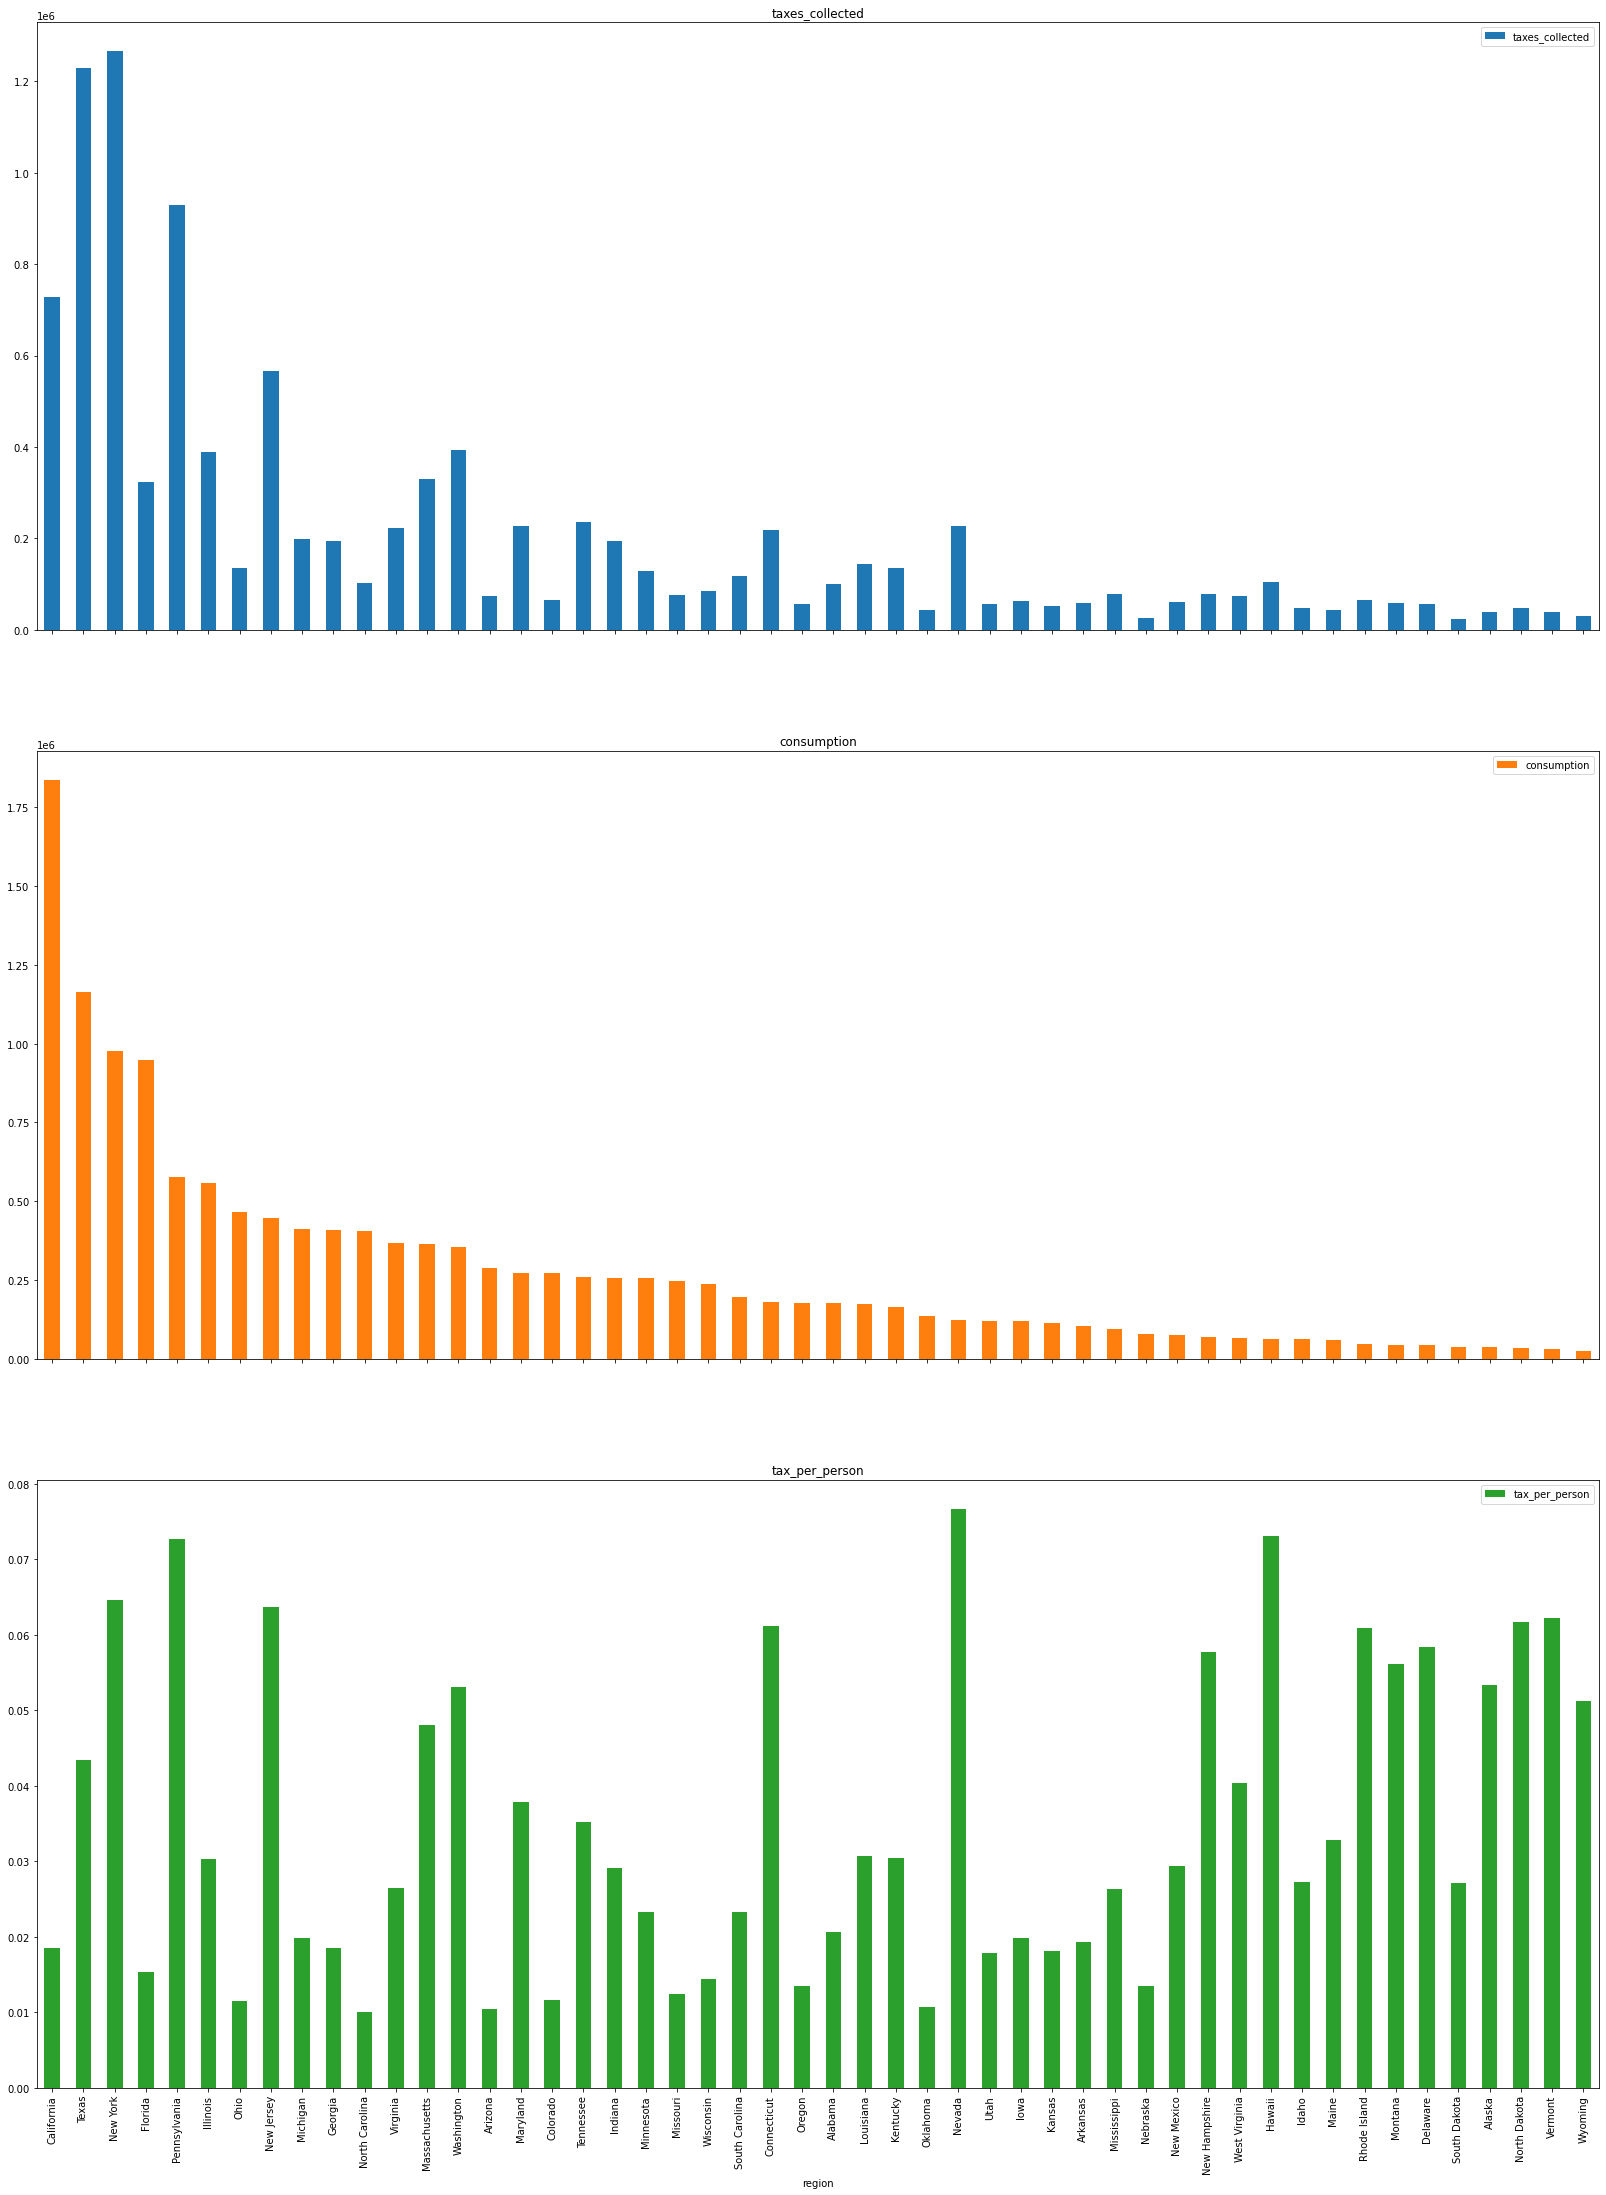

In [785]:
data_clean_grouped.plot.bar(subplots=True, figsize=(28, 38));

### Conclusion:
-  the highest tax per person is 0.38 mln $ in **North Dakota**.

### 3.2 Determine state with the third largest amount of collected taxes.

In [786]:
data_clean.dtypes

year                 int64
region              object
consumption          int64
state_code         float64
tax_name            object
tax_code            object
taxes_collected      int64
include?            object
population           int64
tax_per_person     float64
dtype: object

In [789]:
tax_collected = data_clean.groupby('region')['taxes_collected'].agg(['mean']).sort_values(by='mean', ascending=False).head(10)
tax_collected.reset_index(inplace=True) # resetting indexed from 0 again
tax_collected

,region,mean
0,California,5.716945e+06
1,Texas,5.282273e+06
2,Florida,3.456232e+06
3,New York,3.184523e+06
4,Pennsylvania,2.397347e+06
5,Illinois,2.098533e+06
6,Washington,2.013389e+06
7,Ohio,1.993273e+06
8,New Jersey,1.669232e+06
9,Michigan,1.505789e+06


### Conclusion
-  the state with 3rd largest amount of taxes is **Florida**.

### 3.3 Name region with the smallest value of sum of "Individual Income Taxes" and "Income Taxes"

In [910]:
data_clean.columns

Index(['year', 'region', 'consumption', 'state_code', 'tax_name', 'tax_code',
       'taxes_collected', 'include?', 'population', 'tax_per_person',
       'cons_per_person', 'cons_change'],
      dtype='object')

- **Individual Income Taxes**

Filter the dataset only for **Individual Income Taxes**.

In [911]:
data_clean['tax_name'].unique()

array(['Sales and Gross Receipts Taxes', 'Salesand Gross Receipts Taxes',
       'General Sales and Gross Receipts Taxes',
       'Selective Sales and Gross Receipts Taxes',
       'Selective Salesand Gross Receipts Taxes',
       'Alcoholic Beverages Sales Tax', 'Amusements Sales Tax',
       'Insurance Premiums Sales Tax', 'Motor Fuels Sales Tax',
       'Pari mutuels Sales Tax', 'Public Utilities Sales Tax',
       'Tobacco Products Sales Tax',
       'Other Selective Sales and Gross Receipts Taxes',
       'Other Selective Salesand Gross Receipts Taxes', 'License Taxes',
       'Alcoholic Beverages License', 'Amusements License',
       'Hunting and Fishing License', 'Huntingand Fishing License',
       'Motor Vehicle License', 'Motor Vehicle Operators License',
       'Public Utilities License', 'Occupation and Business License NEC',
       'Occupationand Business License NEC', 'Other License Taxes',
       'Other Taxes', 'Death and Gift Taxes',
       'Documentarty and Stock Tran

In [912]:
ind_income_tax = data_clean[data_clean['tax_name'] == 'Individual Income Taxes']
ind_income_tax

,year,region,consumption,state_code,tax_name,tax_code,taxes_collected,include?,population,tax_per_person,cons_per_person,cons_change


In [800]:
ind_income_tax_grouped = ind_income_tax.groupby('region')['taxes_collected'].agg(['sum']).sort_values(by='sum', ascending=False)
ind_income_tax_grouped.reset_index(inplace=True) # resetting indexed from 0 again
ind_income_tax_grouped

,region,sum


### Conclusion
-  there are no individual income taxes sliced as 'included?' - 'no'.

_To be noticed: in the given task it is required to use only 'included?' = 'no' slice of data through all tasks._

- **Income Taxes**

Filter the dataset only for **Income Taxes**.

In [913]:
income_tax = data_clean[data_clean['tax_name'] == 'Income Taxes']
income_tax

,year,region,consumption,state_code,tax_name,tax_code,taxes_collected,include?,population,tax_per_person,cons_per_person,cons_change


In [914]:
income_tax_grouped = income_tax.groupby('region')['taxes_collected'].agg(['sum']).sort_values(by='sum', ascending=False).tail(10)
income_tax_grouped.reset_index(inplace=True) # resetting indexed from 0 again
income_tax_grouped

,region,sum


### Conclusion
-  there are no income taxes sliced as 'included?' - 'no'.

_To be noticed: in the given task it is required to use only 'included?' = 'no' slice of data through all tasks._

### 3.4 Calculate percent changes of personal consumption expenditures between 2018 and 2020 for each state and determine state and year with highest change (example: Florida 2018/2019)

In [915]:
data_clean['cons_per_person'] = data_clean['consumption'] / data_clean['population']
data_clean

,year,region,consumption,state_code,tax_name,tax_code,taxes_collected,include?,population,tax_per_person,cons_per_person,cons_change
0,2018,Connecticut,181568,7.0,Sales and Gross Receipts Taxes,TA1,6991470,no,3573880,1.956269,0.050804,NaN
1,2019,Connecticut,185316,7.0,Sales and Gross Receipts Taxes,TA1,6991470,no,3573880,1.956269,0.051853,0.020642
2,2020,Connecticut,179406,7.0,Sales and Gross Receipts Taxes,TA1,6991470,no,3573880,1.956269,0.050199,-0.031891
3,2018,Maine,60086,20.0,Sales and Gross Receipts Taxes,TA1,2165142,no,1335063,1.621753,0.045006,-0.103450
4,2019,Maine,62130,20.0,Sales and Gross Receipts Taxes,TA1,2165142,no,1335063,1.621753,0.046537,0.034018
...,...,...,...,...,...,...,...,...,...,...,...,...
3415,2019,Oregon,180750,38.0,Taxes NEC,T99,0,no,4146592,0.000000,0.043590,0.044864
3416,2020,Oregon,178375,38.0,Taxes NEC,T99,0,no,4146592,0.000000,0.043017,-0.013140
3417,2018,Washington,347411,48.0,Taxes NEC,T99,0,no,7425432,0.000000,0.046787,0.087625
3418,2019,Washington,363100,48.0,Taxes NEC,T99,0,no,7425432,0.000000,0.048900,0.045160


Group data per two columns _'region', 'year'_.

In [916]:
cons_per_person_grouped = data_clean.groupby(['region', 'year'], as_index = False)['cons_per_person'].agg({'cons_per_person_mean': 'median'}).sort_values(by='year', ascending=False)
cons_per_person_grouped

,region,year,cons_per_person_mean
149,Wyoming,2020,0.042262
131,Utah,2020,0.039136
71,Mississippi,2020,0.032110
68,Minnesota,2020,0.045115
65,Michigan,2020,0.041234
...,...,...,...
69,Mississippi,2018,0.031703
66,Minnesota,2018,0.045824
63,Michigan,2018,0.041289
60,Massachusetts,2018,0.053142


Calculate the consumption percentage change between years.

In [917]:
# consumption_change = pd.DataFrame({'state':[], '2018/2019':[], '2019/2020':[]})
# consumption_change

In [918]:
#calculate percent change between consecutive values in 'cons_per_person_mean' column
data_clean['cons_change'] = data_clean['cons_per_person'].pct_change()

#view updated DataFrame
data_clean

,year,region,consumption,state_code,tax_name,tax_code,taxes_collected,include?,population,tax_per_person,cons_per_person,cons_change
0,2018,Connecticut,181568,7.0,Sales and Gross Receipts Taxes,TA1,6991470,no,3573880,1.956269,0.050804,NaN
1,2019,Connecticut,185316,7.0,Sales and Gross Receipts Taxes,TA1,6991470,no,3573880,1.956269,0.051853,0.020642
2,2020,Connecticut,179406,7.0,Sales and Gross Receipts Taxes,TA1,6991470,no,3573880,1.956269,0.050199,-0.031891
3,2018,Maine,60086,20.0,Sales and Gross Receipts Taxes,TA1,2165142,no,1335063,1.621753,0.045006,-0.103450
4,2019,Maine,62130,20.0,Sales and Gross Receipts Taxes,TA1,2165142,no,1335063,1.621753,0.046537,0.034018
...,...,...,...,...,...,...,...,...,...,...,...,...
3415,2019,Oregon,180750,38.0,Taxes NEC,T99,0,no,4146592,0.000000,0.043590,0.044864
3416,2020,Oregon,178375,38.0,Taxes NEC,T99,0,no,4146592,0.000000,0.043017,-0.013140
3417,2018,Washington,347411,48.0,Taxes NEC,T99,0,no,7425432,0.000000,0.046787,0.087625
3418,2019,Washington,363100,48.0,Taxes NEC,T99,0,no,7425432,0.000000,0.048900,0.045160


In [919]:
change_grouped = data_clean.groupby(['region', 'year'], as_index = False)['cons_change'].agg({'cons_change_mean': 'mean'}).sort_values(by='year', ascending=False)
change_grouped

,region,year,cons_change_mean
149,Wyoming,2020,-0.014976
131,Utah,2020,0.012295
71,Mississippi,2020,-0.005552
68,Minnesota,2020,-0.042821
65,Michigan,2020,-0.028537
...,...,...,...
69,Mississippi,2018,-0.145452
66,Minnesota,2018,0.181061
63,Michigan,2018,0.058983
60,Massachusetts,2018,0.160732


Create a new variable for maximun mean value in each year (2018, 2019, 2020).

In [920]:
change2018 = change_grouped[change_grouped['year'] == 2018]['cons_change_mean'].max()
change2018

0.26815594551122485

In [921]:
change2019 = change_grouped[change_grouped['year'] == 2019]['cons_change_mean'].max()
change2019

0.053625377643504724

In [922]:
change2020 = change_grouped[change_grouped['year'] == 2020]['cons_change_mean'].max()
change2020

0.012424592879692442

Get a result of the changes in each year.

In [923]:
result_change = change_grouped[change_grouped['cons_change_mean'].isin([change2018, change2019, change2020])]
result_change

,region,year,cons_change_mean
35,Idaho,2020,0.012425
130,Utah,2019,0.053625
24,Florida,2018,0.268156


### Conclusion:
- In 2018 the highest change in consumption was in **Florida** (26.8%).
- In 2019 the highest change in consumption was in **Utah** (5.4%).
- In 2020 the highest change in consumption was in **Idaho** (1.2%).

All the changes a negative, meaning people consume less each year.

### 3.5 Determine Region with the highest average Personal Consumption Expenditures per person in 2020

In [924]:
data_clean['cons_per_person'] = data_clean['consumption'] / data_clean['population']
data_clean['cons_per_person']

0       0.050804
1       0.051853
2       0.050199
3       0.045006
4       0.046537
          ...   
3415    0.043590
3416    0.043017
3417    0.046787
3418    0.048900
3419    0.047703
Name: cons_per_person, Length: 3420, dtype: float64

In [925]:
consumption2020 = data_clean[data_clean['year'] == 2020]
consumption2020

,year,region,consumption,state_code,tax_name,tax_code,taxes_collected,include?,population,tax_per_person,cons_per_person,cons_change
2,2020,Connecticut,179406,7.0,Sales and Gross Receipts Taxes,TA1,6991470,no,3573880,1.956269,0.050199,-0.031891
5,2020,Maine,61124,20.0,Sales and Gross Receipts Taxes,TA1,2165142,no,1335063,1.621753,0.045784,-0.016192
8,2020,Massachusetts,358472,22.0,Sales and Gross Receipts Taxes,TA1,8809249,no,6863246,1.283540,0.052231,-0.050617
11,2020,New Hampshire,70719,30.0,Salesand Gross Receipts Taxes,TA1,959384,no,1349767,0.710777,0.052393,-0.018201
14,2020,Rhode Island,45397,40.0,Sales and Gross Receipts Taxes,TA1,1691782,no,1056486,1.601329,0.042970,-0.038158
...,...,...,...,...,...,...,...,...,...,...,...,...
3407,2020,California,1835981,5.0,Taxes NEC,T99,79323,no,39399349,0.002013,0.046599,-0.044488
3410,2020,Hawaii,63427,12.0,Taxes NEC,T99,0,no,1424203,0.000000,0.044535,-0.053003
3413,2020,Nevada,123054,29.0,Taxes NEC,T99,575233,no,2972405,0.193524,0.041399,-0.022815
3416,2020,Oregon,178375,38.0,Taxes NEC,T99,0,no,4146592,0.000000,0.043017,-0.013140


In [926]:
consumption = consumption2020.groupby('region')['consumption'].agg(['mean']).sort_values(by='mean', ascending=False).head(10)
consumption.reset_index(inplace=True) # resetting indexed from 0 again

consumption

,region,mean
0,California,1835981.0
1,Texas,1164466.0
2,New York,961707.0
3,Florida,947906.0
4,Pennsylvania,570772.0
5,Illinois,553612.0
6,Ohio,466160.0
7,New Jersey,446078.0
8,Michigan,411364.0
9,Georgia,408753.0


### Conclusion
-  **California** is the highest average Personal Consumption Expenditures per person in 2020 (1835981$).

## 4. Data Visualization _(Tableau dashboarding)_

In [927]:
# writing to xlsx dataset for visualization
tax_data = data_clean.to_excel('/Users/yuliabezginova/PycharmProjects/income_tax/tax_data.xlsx')

Tableau workbook: https://dub01.online.tableau.com/#/site/yuliabezginova/workbooks/948545?:origin=card_share_link

### 4.1 Amount of taxes collected per person in each state

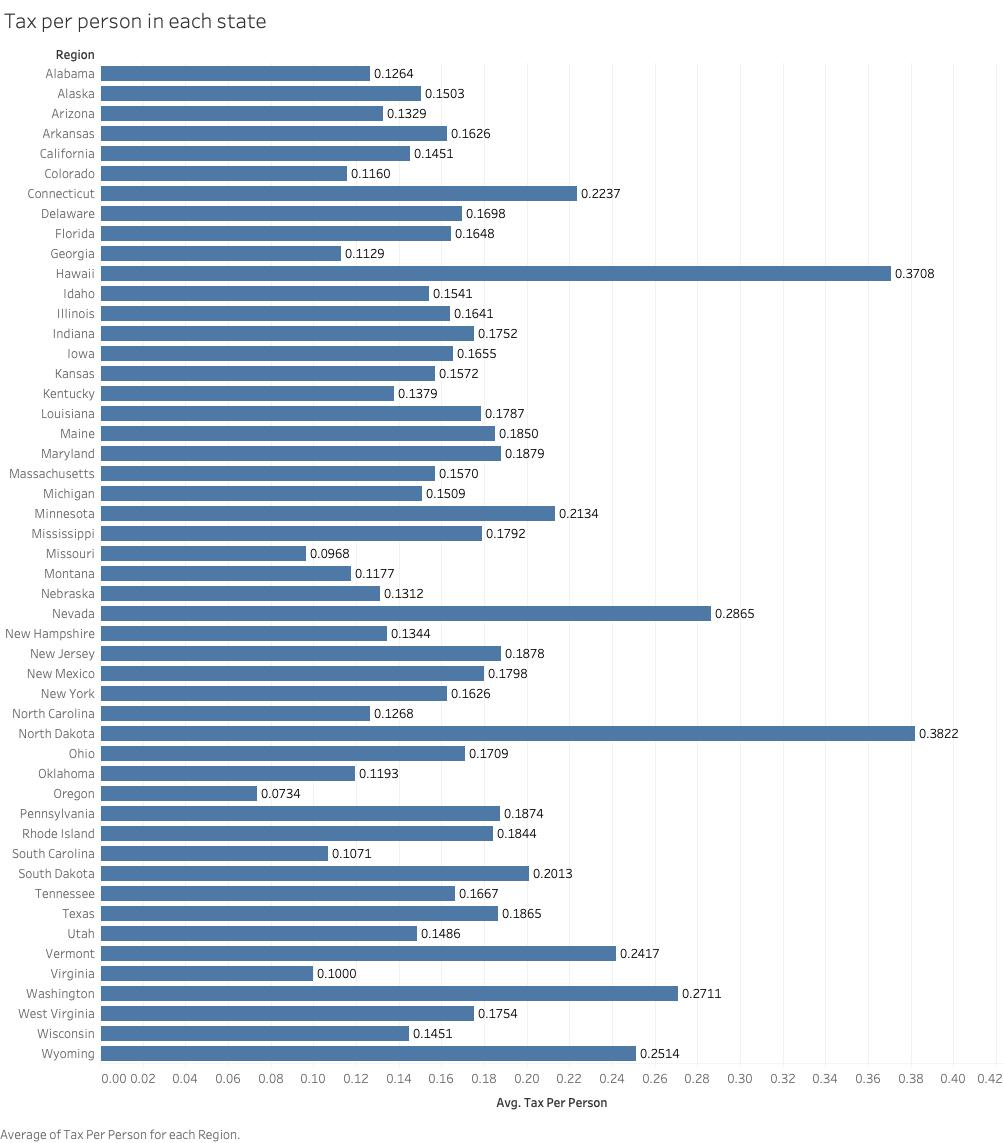

### 4.2 Amount of taxes collected in each state

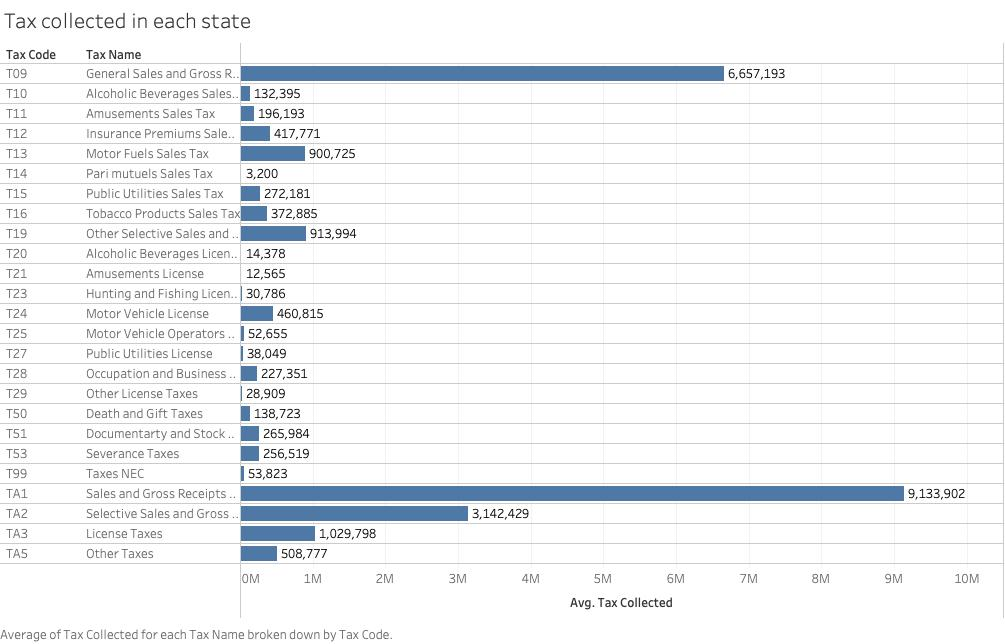

### 4.3 Breakdown of collected taxes (tax types)

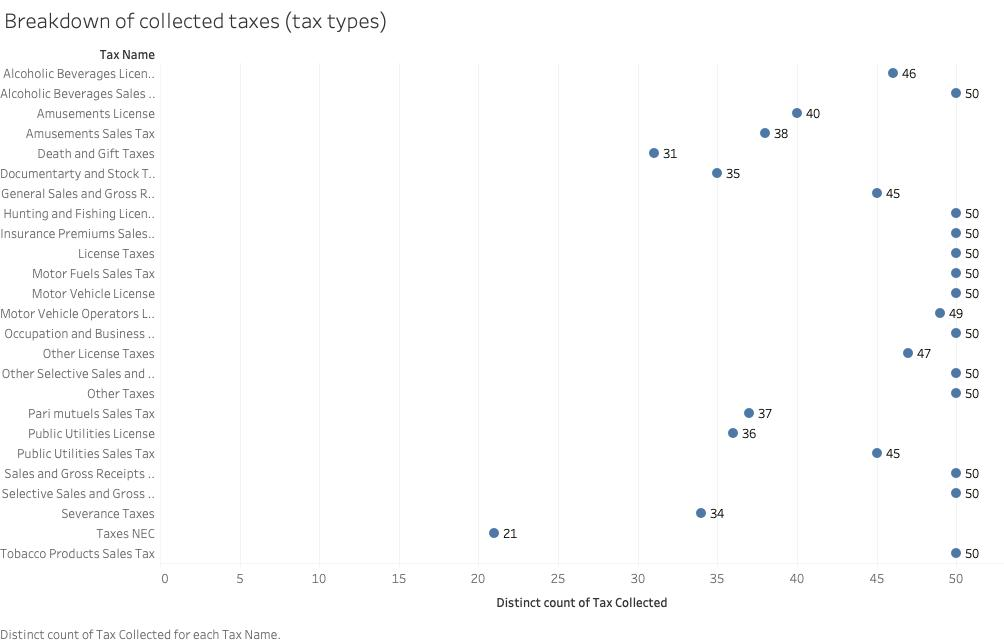

### 4.4 How value of personal consumption expenditures has changed in time.

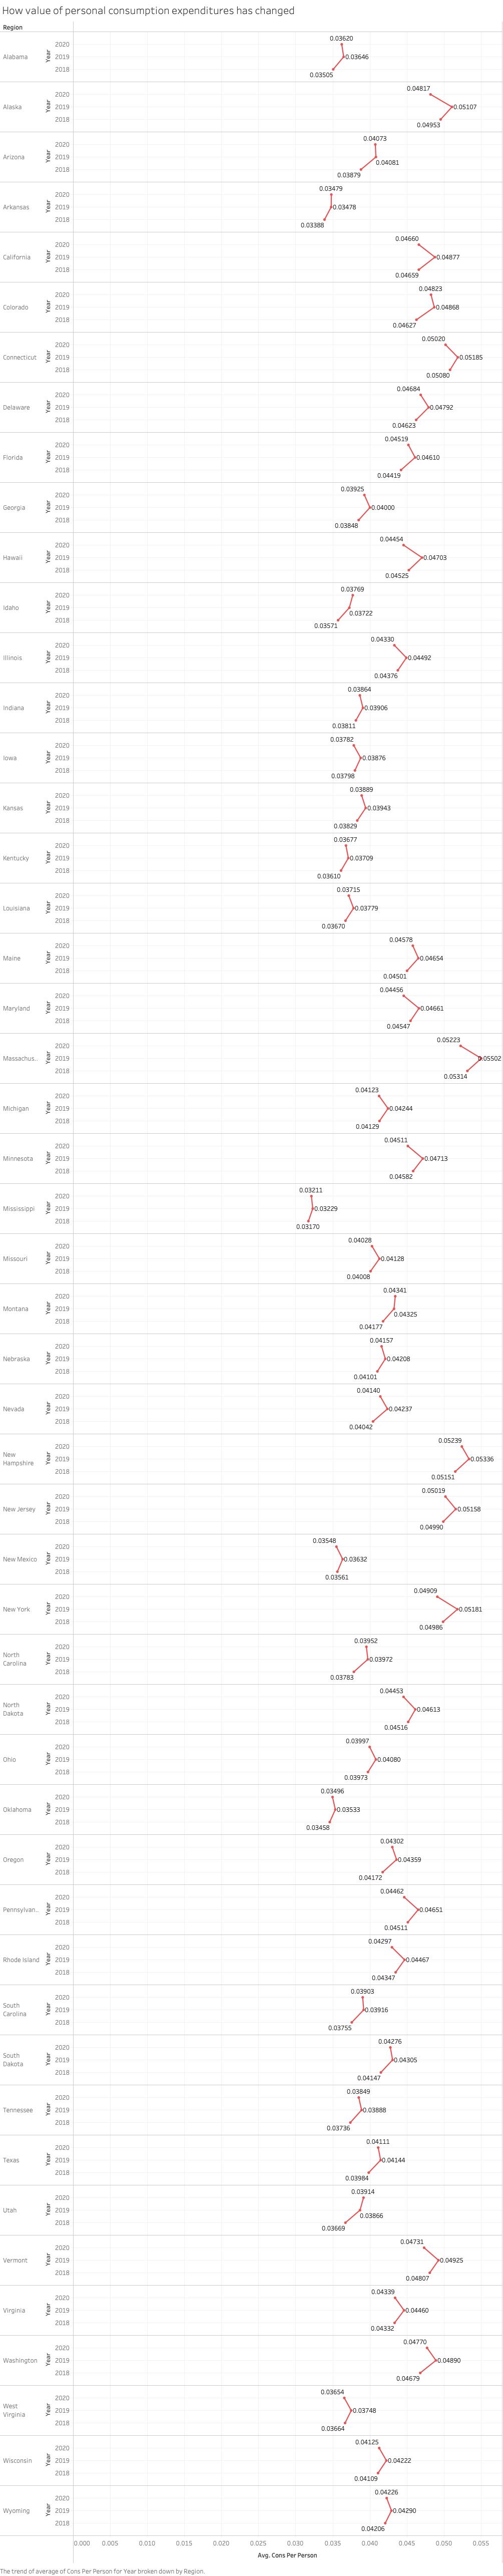

### 4.5 Ranking of regions based on average value of personal consumption expenditures per person.

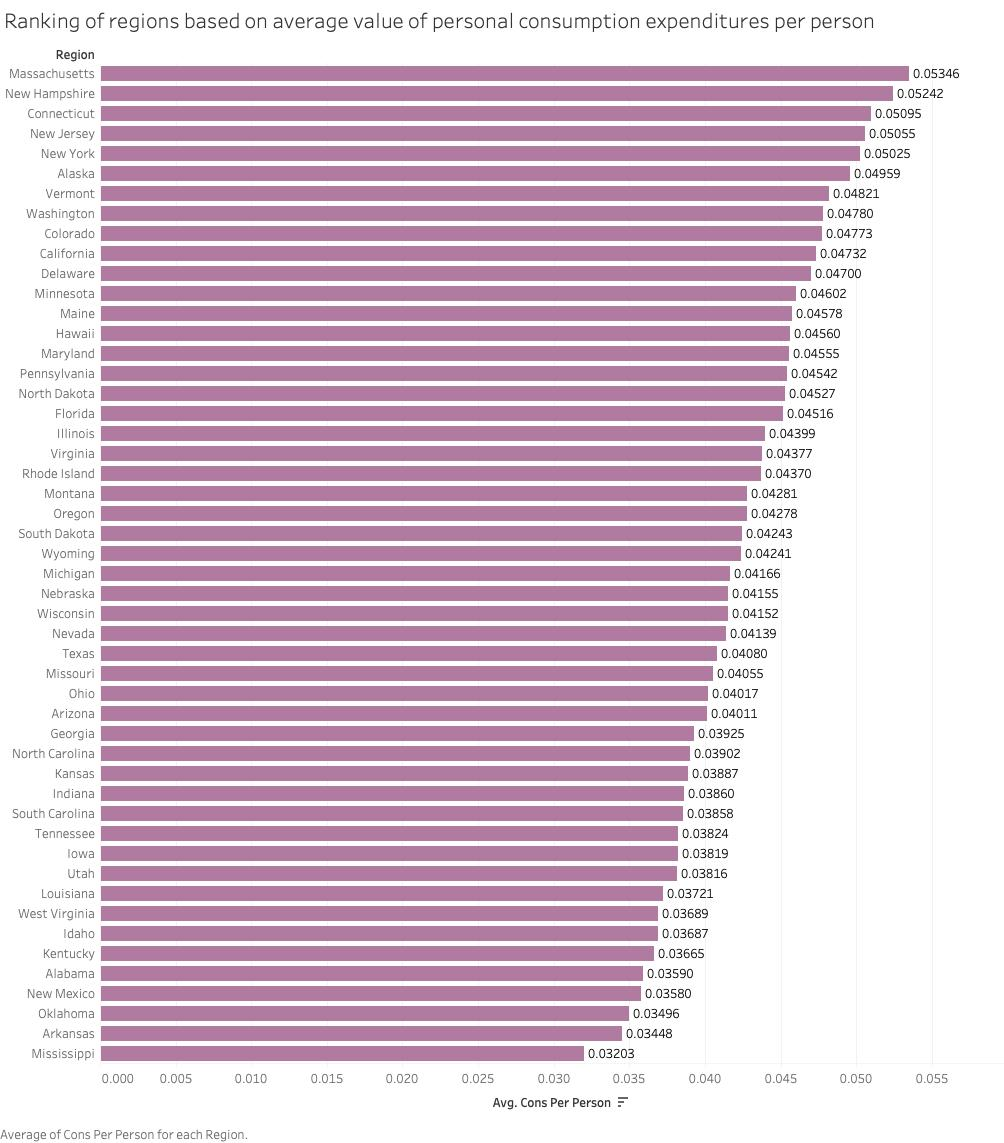

### Tools used for this project:
- Python (Jupyter, pandas, matpplotlib)
- Tableau dashboards

_Thank you for going through this project. Your feedback and comments are very welcome to_ **_ybezginova2021@gmail.com_**

_Thank you!_

_Best wishes,_

_Yulia_